In [1]:
# 데이터의 타당성을 높이기 위해 주성분 분석을 실시한다.
# 데이터의 벡터간 scale을 맞추기 위해 정규화를 진행하고 시작한다.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # scree plot 그리기 위해 설치
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

from sklearn.preprocessing import StandardScaler# 데이터 표준화 위해 설치
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA # PCA 하기 위해 설치

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
# plt.rc('font', family='AppleGothic') # 맥
plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [3]:
# 사용할 파일 불러오기

tomato = pd.read_csv('/Users/chuu/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data.csv')
tomato

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,엄궁도매,30000.0
22076,2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,엄궁도매,30000.0
22077,2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0
22078,2018-12-31,13,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000,토마토(10kg),부산광역시,엄궁도매,30000.0


In [4]:
# 원본 데이터 테스트/트레인 셋으로 나누기
tomato_1317 = tomato[tomato['일시'].str.contains('2013|2014|2015|2016|2017')]
tomato_1317.tail()
# 새로 만든 변수 데이터 프레임과 합치기 위해 인덱스를 리셋한 후 인덱스 컬럼 제거.
tomato_18 = tomato[tomato['일시'].str.contains('2018')].reset_index()
tomato_18 = tomato_18.drop('index', axis = 1)
tomato_18.head()

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2018-01-02,0,2018,0.003953,0.701250,0.020795,0.018120,45.307312,32.994735,7.90,토마토(10kg),강원도,가락도매,20000.0
1,2018-01-02,1,2018,0.005128,0.703976,0.011081,0.033014,46.648811,28.977252,7.42,토마토(10kg),경기도,가락도매,20000.0
2,2018-01-02,2,2018,0.006303,0.755421,0.016107,0.028053,38.489170,24.442848,7.50,토마토(10kg),인천광역시,가락도매,20000.0
3,2018-01-02,3,2018,0.005581,0.766784,0.009671,0.039934,43.081216,28.399253,7.90,토마토(10kg),서울특별시,가락도매,20000.0
4,2018-01-02,4,2018,0.004252,0.715649,0.023294,0.017968,70.011003,39.956905,6.22,토마토(10kg),경상북도,북부도매,25000.0


In [5]:
# 분석에 사용할 독립변수 컬럼 따로 빼기
tom_f = tomato.iloc[:,3:10]
tom_f

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000
1,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000
2,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333
3,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000
4,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000
...,...,...,...,...,...,...,...
22075,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000
22076,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429
22077,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000
22078,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000


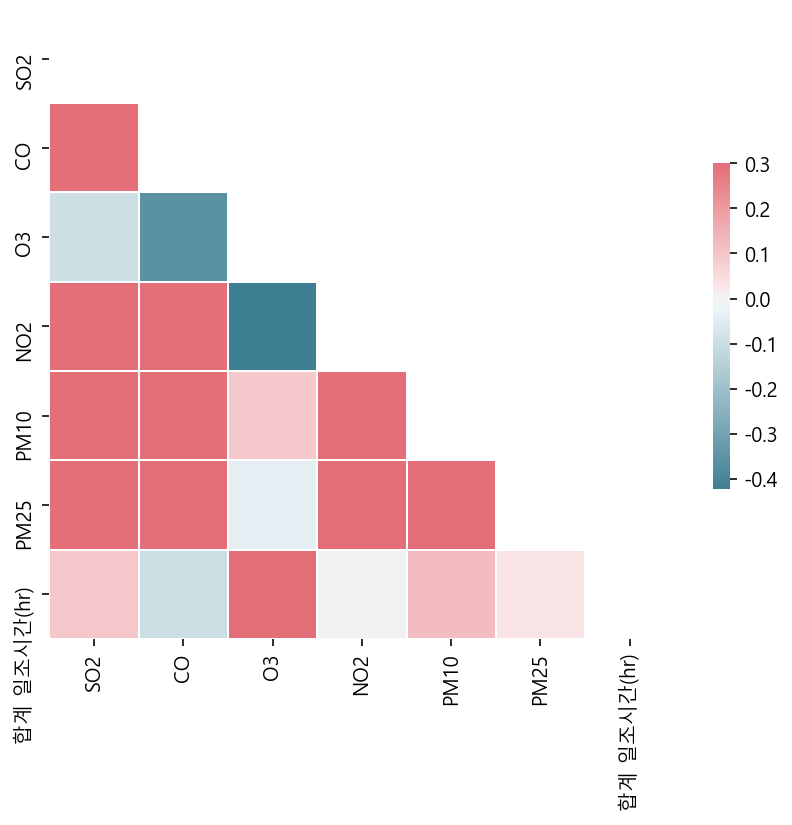

In [6]:
# 변수끼리의 상관관계 계산
corr = tom_f.corr()

# 삼각 행렬 모양으로 만들기
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# 컬러맵 지정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 상관관계 계수를 히트맵 그래프로 나타낸다.
plt.figure(figsize=(7,6))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# 데이터의 스케일을 맞추기 위해 표준화 한다.

tomato_std = StandardScaler().fit_transform(tom_f)
# tomato_std = Normalizer().fit_transform(tom_f)
tomato_std = pd.DataFrame(tomato_std)
tomato_std.columns=['SO2','CO','O3','NO2','PM10','PM25','합계 일조시간(hr)']
tomato_std

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.521464,0.075580,0.254464,-1.175089,-0.432793,1.306502,0.475751
1,0.585317,-0.430881,-0.343693,-0.253621,-0.873383,1.306502,0.612504
2,1.220889,-0.134442,-0.250621,-0.626195,-0.883098,1.306502,-0.094052
3,0.245001,-0.514922,-0.230091,0.005870,-1.130464,1.306502,0.686140
4,0.564655,0.456786,-0.141029,-0.992471,-0.014621,1.306502,0.391595
...,...,...,...,...,...,...,...
22075,-0.607830,0.070713,-0.757797,0.189943,-0.953943,-1.295116,0.028674
22076,-0.652900,-0.084798,-0.832320,0.124846,-0.661602,-0.535857,-0.149780
22077,-0.626195,0.678204,-0.988532,0.559786,-0.443858,-0.208844,0.712438
22078,-0.169746,-0.689710,-1.051974,0.599244,-0.709462,-0.898338,-0.208013


In [8]:
# 테스트 데이터로 쓰일 2018 데이터 분리하기 위해 일시 컬럼과 병합
tom_f = pd.concat([tomato['일시'],tomato_std], axis = 1)
tom_f

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,2013-01-02,0.521464,0.075580,0.254464,-1.175089,-0.432793,1.306502,0.475751
1,2013-01-02,0.585317,-0.430881,-0.343693,-0.253621,-0.873383,1.306502,0.612504
2,2013-01-02,1.220889,-0.134442,-0.250621,-0.626195,-0.883098,1.306502,-0.094052
3,2013-01-02,0.245001,-0.514922,-0.230091,0.005870,-1.130464,1.306502,0.686140
4,2013-01-02,0.564655,0.456786,-0.141029,-0.992471,-0.014621,1.306502,0.391595
...,...,...,...,...,...,...,...,...
22075,2018-12-31,-0.607830,0.070713,-0.757797,0.189943,-0.953943,-1.295116,0.028674
22076,2018-12-31,-0.652900,-0.084798,-0.832320,0.124846,-0.661602,-0.535857,-0.149780
22077,2018-12-31,-0.626195,0.678204,-0.988532,0.559786,-0.443858,-0.208844,0.712438
22078,2018-12-31,-0.169746,-0.689710,-1.051974,0.599244,-0.709462,-0.898338,-0.208013


In [9]:
# 2013-2017 데이터 분리 
tom1317_std = tom_f[tom_f['일시'].str.contains('2013|2014|2015|2016|2017')]
tom1317_std.tail()

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
18415,2017-12-29,0.045475,2.598877,-0.343303,1.204466,1.535455,1.747405,0.475751
18416,2017-12-29,0.141067,1.524991,-0.465620,0.732341,1.566462,1.451161,0.066244
18417,2017-12-29,-0.437048,1.997069,-1.578203,1.871178,1.619081,3.509684,-1.680736
18418,2017-12-29,0.043736,0.062029,-0.551172,1.116096,1.831219,3.596347,0.475751
18419,2017-12-29,0.259551,1.423096,-0.190477,-0.010752,0.648499,1.111657,-0.698294


In [10]:
# 일시 컬럼 제거
tom1317_std = tom1317_std.drop(['일시'],axis = 1)
tom1317_std.tail()

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
18415,0.045475,2.598877,-0.343303,1.204466,1.535455,1.747405,0.475751
18416,0.141067,1.524991,-0.465620,0.732341,1.566462,1.451161,0.066244
18417,-0.437048,1.997069,-1.578203,1.871178,1.619081,3.509684,-1.680736
18418,0.043736,0.062029,-0.551172,1.116096,1.831219,3.596347,0.475751
18419,0.259551,1.423096,-0.190477,-0.010752,0.648499,1.111657,-0.698294


In [11]:
# 2018 데이터 분리 
tom18_std = tom_f[tom_f['일시'].str.contains('2018')].reset_index()
tom18_std.head()

,index,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,18420,2018-01-02,-0.252558,1.245962,-0.537412,-0.313345,0.005574,0.837033,0.370556
1,18421,2018-01-02,0.333786,1.262056,-1.359932,1.130802,0.062733,0.427742,0.244323
2,18422,2018-01-02,0.920100,1.565811,-0.934412,0.649783,-0.284934,-0.034212,0.265362
3,18423,2018-01-02,0.559798,1.632903,-1.479310,1.801791,-0.089276,0.368857,0.370556
4,18424,2018-01-02,-0.103461,1.330981,-0.325848,-0.328151,1.058150,1.546322,-0.071260


In [12]:
# 일시 컬럼 제거
tom18_std = tom18_std.drop(['일시'],axis = 1)
tom18_std.head()

,index,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,18420,-0.252558,1.245962,-0.537412,-0.313345,0.005574,0.837033,0.370556
1,18421,0.333786,1.262056,-1.359932,1.130802,0.062733,0.427742,0.244323
2,18422,0.920100,1.565811,-0.934412,0.649783,-0.284934,-0.034212,0.265362
3,18423,0.559798,1.632903,-1.479310,1.801791,-0.089276,0.368857,0.370556
4,18424,-0.103461,1.330981,-0.325848,-0.328151,1.058150,1.546322,-0.071260


In [13]:
# 공분산 행렬 구하기
tom_cov = np.cov(tom1317_std.T)
tom_cov

array([[ 1.06118832,  0.56014274, -0.10294268,  0.5508154 ,  0.47070597,
         0.30142198,  0.09629582],
       [ 0.56014274,  1.03605515, -0.3632231 ,  0.68964182,  0.5877588 ,
         0.47707359, -0.10144787],
       [-0.10294268, -0.3632231 ,  1.01092305, -0.42970494,  0.10699311,
        -0.04021155,  0.35577954],
       [ 0.5508154 ,  0.68964182, -0.42970494,  1.00452378,  0.46399532,
         0.34715941,  0.01011005],
       [ 0.47070597,  0.5877588 ,  0.10699311,  0.46399532,  1.01449657,
         0.50478263,  0.11862896],
       [ 0.30142198,  0.47707359, -0.04021155,  0.34715941,  0.50478263,
         0.85944748,  0.02217251],
       [ 0.09629582, -0.10144787,  0.35577954,  0.01011005,  0.11862896,
         0.02217251,  0.98637892]])

In [14]:
# 고유값과 고유벡터 계산 (고유분해)
eig_vals, eig_vecs= np.linalg.eig(tom_cov)

In [15]:
# 고유값 확인
eig_vals

array([3.08581464, 1.49584885, 0.80967237, 0.60412299, 0.41589836,
       0.2728304 , 0.28882567])

In [16]:
# 고유벡터 확인
eig_vecs

array([[-0.42827369, -0.13880477,  0.33562884, -0.70913724,  0.389844  ,
         0.1679534 ,  0.04007295],
       [-0.51121458,  0.10525366, -0.07068921,  0.06898467, -0.16712725,
        -0.54556389,  0.62630184],
       [ 0.19515859, -0.67252774, -0.27791964, -0.318497  , -0.11857549,
        -0.52211511, -0.21041761],
       [-0.47354998,  0.13751912,  0.31114483,  0.16027798, -0.25631321,
        -0.27660399, -0.70152159],
       [-0.42081286, -0.33759503, -0.35134612,  0.00679082, -0.51433368,
         0.56578075,  0.02844153],
       [-0.34021974, -0.15799356, -0.45895765,  0.38640903,  0.68687488,
        -0.00421126, -0.16589052],
       [ 0.00847959, -0.59959775,  0.61173496,  0.4646268 ,  0.06322416,
         0.07008667,  0.20347844]])

In [17]:
# 주성분의 고유값 비율 확인
eig_vals_sum = np.sum(eig_vals)
for eig_val in eig_vals:
    print (str(eig_val/eig_vals_sum))

0.44253675137359794
0.2145197194218656
0.11611513310812334
0.08663729165228416
0.059643993334903035
0.03912661431232989
0.04142049679689611


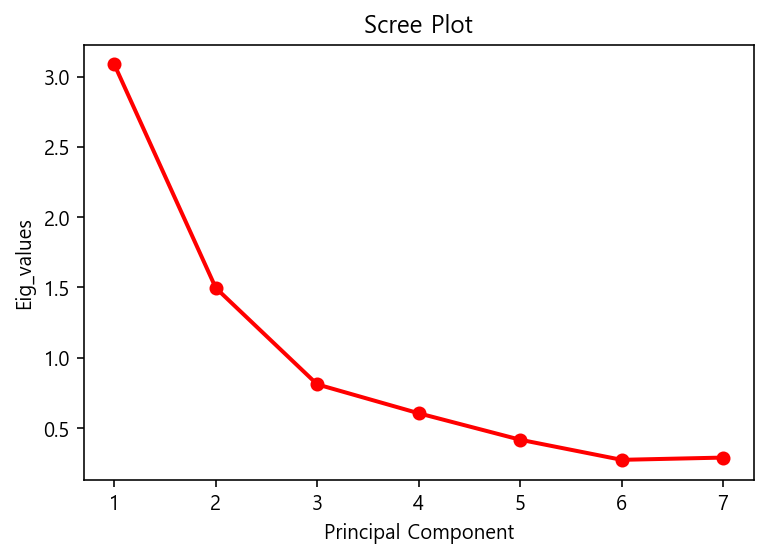

In [18]:
# 위 데이터를 이용해 scree plot 그려서 고유값 확인. 주성분 개수를 정할 때 한 눈에 볼 수 있어서 좋다.
sing_vals = np.arange(len(eig_vals))+1
plt.plot(sing_vals, eig_vals, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eig_values")
plt.show()

In [19]:
# 주성분의 개수를 4개로 하여 주성분 분석
pca = PCA(n_components = 4)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values = pca.fit_transform(tom1317_std)
pca_values

array([[-0.16852443,  0.72621806,  0.42010234, -0.12306583],
       [-0.03355734,  0.19264792, -0.32853498, -0.44159651],
       [ 0.19749249, -0.06343298,  0.04970642,  0.40637065],
       ...,
       [ 3.83479135, -1.51274429,  2.47175407, -1.87058604],
       [ 2.59394385,  0.93053919,  1.48908518, -1.98491661],
       [ 1.44506765, -0.28102112,  1.12601445, -0.11664573]])

In [21]:
# 고유값의 누적 설명력 확인. 80% 넘는것을 확인할 수 있다.
sum(pca.explained_variance_ratio_)

0.8598088955558716

In [22]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf = pd.DataFrame(data=pca_values, columns = ['PC1', 'PC2','PC3','PC4'])
pcadf

,PC1,PC2,PC3,PC4
0,-0.168524,0.726218,0.420102,-0.123066
1,-0.033557,0.192648,-0.328535,-0.441597
2,0.197492,-0.063433,0.049706,0.406371
3,-0.230364,0.152334,-0.404793,-0.715006
4,0.385199,0.491710,0.464222,-0.237707
...,...,...,...,...
18415,3.139334,0.399444,0.745603,-1.390188
18416,2.347316,0.226531,0.875952,-0.907076
18417,3.834791,-1.512744,2.471754,-1.870586
18418,2.593944,0.930539,1.489085,-1.984917


In [23]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_1 = tomato_1317.iloc[:,0:3]
tom_2 = tomato_1317.iloc[:,-4:]

In [24]:
# 데이터 병합 후 확인
tom_fin = pd.concat([tom_1,pcadf,tom_2],axis=1)
tom_fin

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2013-01-02,0,2013,-0.168524,0.726218,0.420102,-0.123066,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,-0.033557,0.192648,-0.328535,-0.441597,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.197492,-0.063433,0.049706,0.406371,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,-0.230364,0.152334,-0.404793,-0.715006,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.385199,0.491710,0.464222,-0.237707,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,3.139334,0.399444,0.745603,-1.390188,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,2.347316,0.226531,0.875952,-0.907076,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,3.834791,-1.512744,2.471754,-1.870586,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,2.593944,0.930539,1.489085,-1.984917,토마토(10kg),부산광역시,엄궁도매,21000.0


In [25]:
# 데이터 저장
tom_fin.to_csv('tom1317_fin.csv',encoding = 'cp949', index=False)

In [26]:
# 저장된 데이터 확인
pd.read_csv('tom1317_fin.csv', encoding = 'cp949')

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2013-01-02,0,2013,-0.168524,0.726218,0.420102,-0.123066,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,-0.033557,0.192648,-0.328535,-0.441597,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.197492,-0.063433,0.049706,0.406371,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,-0.230364,0.152334,-0.404793,-0.715006,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.385199,0.491710,0.464222,-0.237707,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,3.139334,0.399444,0.745603,-1.390188,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,2.347316,0.226531,0.875952,-0.907076,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,3.834791,-1.512744,2.471754,-1.870586,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,2.593944,0.930539,1.489085,-1.984917,토마토(10kg),부산광역시,엄궁도매,21000.0


In [27]:
# 18년도 테스트셋도 마찬가지로 pca 분석 실행
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values18 = pca.fit_transform(tom18_std)
pca_values18

array([[ 1.82950001e+03,  1.03468626e+00, -4.97097434e-01,
        -4.24696881e-01],
       [ 1.82849978e+03,  1.65283032e+00, -1.36355753e+00,
        -1.53280857e+00],
       [ 1.82749986e+03,  1.19634640e+00, -1.16889909e+00,
        -1.58709411e+00],
       ...,
       [-1.82750016e+03,  8.51841100e-01, -8.03265039e-03,
        -9.32198439e-01],
       [-1.82850035e+03, -1.65812955e-01, -6.36069578e-01,
        -6.92963867e-01],
       [-1.82950001e+03,  2.64381291e-01,  1.81866060e-01,
        -8.08091596e-01]])

In [28]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf18 = pd.DataFrame(data=pca_values18, columns = ['PC1', 'PC2','PC3','PC4'])
pcadf18

,PC1,PC2,PC3,PC4
0,1829.500014,1.034686,-0.497097,-0.424697
1,1828.499780,1.652830,-1.363558,-1.532809
2,1827.499862,1.196346,-1.168899,-1.587094
3,1826.499763,2.057030,-1.548162,-2.052132
4,1825.500288,1.956821,-0.361766,0.400550
...,...,...,...,...
3655,-1825.500371,-0.508386,-0.476005,-0.708787
3656,-1826.500252,0.001864,-0.431517,-0.248096
3657,-1827.500156,0.851841,-0.008033,-0.932198
3658,-1828.500352,-0.165813,-0.636070,-0.692964


In [29]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_3 = tomato_18.iloc[:,0:3]
tom_4 = tomato_18.iloc[:,-4:]

In [30]:
# 데이터 병합 후 확인
tom_fin18 = pd.concat([tom_3,pcadf18,tom_4],axis=1, sort = False)
tom_fin18

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2018-01-02,0,2018,1829.500014,1.034686,-0.497097,-0.424697,토마토(10kg),강원도,가락도매,20000.0
1,2018-01-02,1,2018,1828.499780,1.652830,-1.363558,-1.532809,토마토(10kg),경기도,가락도매,20000.0
2,2018-01-02,2,2018,1827.499862,1.196346,-1.168899,-1.587094,토마토(10kg),인천광역시,가락도매,20000.0
3,2018-01-02,3,2018,1826.499763,2.057030,-1.548162,-2.052132,토마토(10kg),서울특별시,가락도매,20000.0
4,2018-01-02,4,2018,1825.500288,1.956821,-0.361766,0.400550,토마토(10kg),경상북도,북부도매,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
3655,2018-12-31,10,2018,-1825.500371,-0.508386,-0.476005,-0.708787,토마토(10kg),울산광역시,엄궁도매,30000.0
3656,2018-12-31,11,2018,-1826.500252,0.001864,-0.431517,-0.248096,토마토(10kg),경상남도,엄궁도매,30000.0
3657,2018-12-31,12,2018,-1827.500156,0.851841,-0.008033,-0.932198,토마토(10kg),광주광역시,각화도매,31000.0
3658,2018-12-31,13,2018,-1828.500352,-0.165813,-0.636070,-0.692964,토마토(10kg),부산광역시,엄궁도매,30000.0


In [31]:
# 데이터 저장
tom_fin18.to_csv('tom18_fin.csv',encoding = 'cp949', index=False)

In [32]:
# 저장된 데이터 확인
pd.read_csv('tom18_fin.csv', encoding = 'cp949')

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2018-01-02,0,2018,1829.500014,1.034686,-0.497097,-0.424697,토마토(10kg),강원도,가락도매,20000.0
1,2018-01-02,1,2018,1828.499780,1.652830,-1.363558,-1.532809,토마토(10kg),경기도,가락도매,20000.0
2,2018-01-02,2,2018,1827.499862,1.196346,-1.168899,-1.587094,토마토(10kg),인천광역시,가락도매,20000.0
3,2018-01-02,3,2018,1826.499763,2.057030,-1.548162,-2.052132,토마토(10kg),서울특별시,가락도매,20000.0
4,2018-01-02,4,2018,1825.500288,1.956821,-0.361766,0.400550,토마토(10kg),경상북도,북부도매,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
3655,2018-12-31,10,2018,-1825.500371,-0.508386,-0.476005,-0.708787,토마토(10kg),울산광역시,엄궁도매,30000.0
3656,2018-12-31,11,2018,-1826.500252,0.001864,-0.431517,-0.248096,토마토(10kg),경상남도,엄궁도매,30000.0
3657,2018-12-31,12,2018,-1827.500156,0.851841,-0.008033,-0.932198,토마토(10kg),광주광역시,각화도매,31000.0
3658,2018-12-31,13,2018,-1828.500352,-0.165813,-0.636070,-0.692964,토마토(10kg),부산광역시,엄궁도매,30000.0
